In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


#### Loading the Dataset.

In [278]:
TitanDF = pd.read_csv('titanic_train.csv')

In [279]:
TitanDF.shape 

(891, 12)

In [280]:
TitanDF

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### Feature column data type indicates that feature data are a mix of continuous and categorical data ,while target / label ('Survived') data type indicates that dependent variable data is categorical in nature.

#### Checking for null / values missing

In [281]:
TitanDF.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

'Age', 'Embarked', and 'Cabin' have null values.

19% of 'Age' data is null value,0.22% of 'Embarked' is null value, while 77.10% 'Cabin' data is null value.

Dropping 'Cabin' since 77.10% of its values is missing and therefore it cannot contribute to building a good model for predicting the target variable values.

In [282]:
TitanDF.drop(columns=['Cabin'],inplace = True)

In [283]:
TitanDF

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


#### Getting the basic summary and statistical information of the data.

In [284]:
TitanDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [285]:
TitanDF.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


A higher Std than mean in 'Fare' column indicates postive skewness.

In [286]:
TitanDF.nunique() #Checking for unique elements in each of the columns

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Embarked         3
dtype: int64

"Survived" - Target / Label column has 2 categories / classes.

"sex" - Feature column has 2 categories / classes.

"Pclass" - Feature column has 2 categories / classes.

"Embarked" -  Feature column has 3 categories / classes.

"SibSp" -  Feature column has 7 discrete values.

"Parch" - Feature column has 7 discrete values.

### Dataframe Description:

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, predict if an arbitrary passenger on Titanic would survive the sinking or not. 


Feature Columns:

Pclass	: Passenger Ticket Class	
	
Sex     : Sex of Passengers

Age     : Age of Passengers

Parch   : Number of parents / children onboard

sibsp   : Number of siblings / spouses onboard

Embarked: Port from which the passenger Embarked

Fare    : Ticket Fare

Cabin   :  Cabin's number


Target Column:

Survived: Whether Survived or not


### This is a Classification Problem since the Target variable / Label column ("Survived") has Catergorical type of Data.

### Interpreting Relationship between Dependent and Independent Variables

#### Analyzing the Target Class

In [287]:
TitanDF['Survived'].unique() 

array([0, 1], dtype=int64)

#### There are 2 unique catergorical values in the Label column / target variable.

In [288]:
TitanDF['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Class   
'0'   : Has 549 values

'1'   : Has 342 values



### Checking for Class Imbalance.

<AxesSubplot:xlabel='Survived', ylabel='count'>

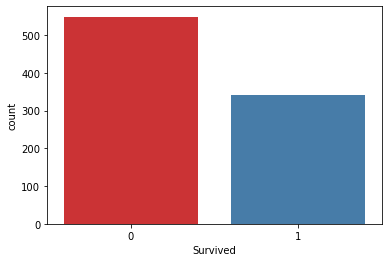

In [289]:
sns.countplot(TitanDF['Survived'], palette="Set1")

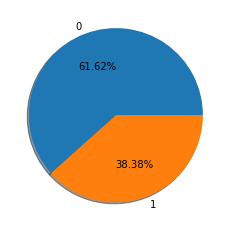

In [290]:
labels = '0','1'
fig, ax = plt.subplots()
ax.pie(TitanDF['Survived'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

Class   
'0'   : Has 61.62% of total values

'1'   : Has 38.38% of total values




#### Classes are imbalanced.

#### Analyzing Feature column Catergorical Classes

In [291]:
TitanDF['Sex'].unique() 

array(['male', 'female'], dtype=object)

'Sex' colum has 2 categories: 'male' and 'female'

In [292]:
TitanDF['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Based on data in the Dataframe above, there were 577 male passengers and 314 female passengers.

<AxesSubplot:xlabel='Sex', ylabel='count'>

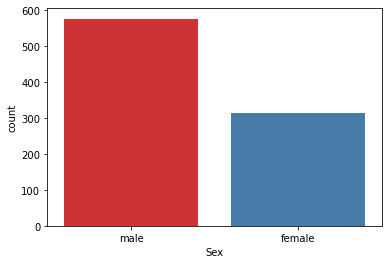

In [293]:
sns.countplot(TitanDF['Sex'], palette="Set1")

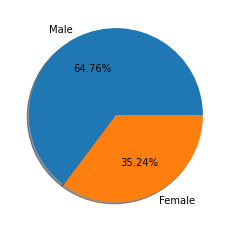

In [294]:
labels = 'Male','Female'
fig, ax = plt.subplots()
ax.pie(TitanDF['Sex'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

Males comprissed 64.76% of the total passengers while Females comprised 35.24%.

In [295]:
TitanDF['Pclass'].unique() 

array([3, 1, 2], dtype=int64)

'Pclass' comprises of ordinal categorical data of classes : 1,2 and, 3

In [296]:
TitanDF['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Pclasses 3,1 and ,2 consist of 491,216 and 184 passengers respectively.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

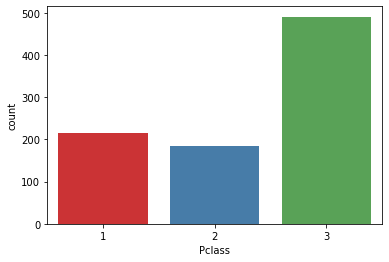

In [297]:
sns.countplot(TitanDF['Pclass'], palette="Set1")

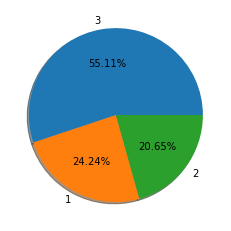

In [298]:
labels = '3','1','2'
fig, ax = plt.subplots()
ax.pie(TitanDF['Pclass'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

Majority of the passengers belonged to Pclass : 3 with 55.11% at total passengers, followed by Pclass: 1 with  20.65% and lastly 20.65% of the passengers belonged to Pclass: 2

In [299]:
TitanDF['Embarked'].unique() 

array(['S', 'C', 'Q', nan], dtype=object)

There are 3 categories denoting the points of embarkation.

In [300]:
TitanDF['Embarked'].isnull().sum() 

2

"guessing the points of embarkation" using estimation techniques is not sensible, therefore, dropping rows with null value since losing those 2 rows will not cause any significant loss to the training dataset

In [301]:
TitanDF.loc[pd.isna(TitanDF["Embarked"]), :].index #finding the indices where 'Embarked' value is NaN

Int64Index([61, 829], dtype='int64')

In [302]:
TitanDF.drop([61,829],inplace=True)

In [303]:
TitanDF.shape

(889, 11)

In [304]:
TitanDF.reset_index(drop=True,inplace = True)

In [305]:
TitanDF['Embarked'].isnull().sum() 

0

All null values from 'Embarked' have been removed.

In [306]:
TitanDF['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

644 embarked from 'S', 168 embarked from C, 77 embarked from Q

<AxesSubplot:xlabel='Embarked', ylabel='count'>

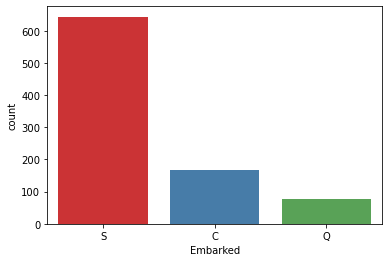

In [307]:
sns.countplot(TitanDF['Embarked'], palette="Set1")

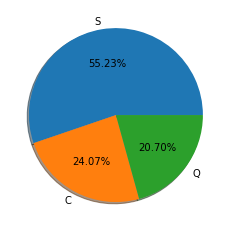

In [308]:
labels = 'S','C','Q'
fig, ax = plt.subplots()
ax.pie(TitanDF['Pclass'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

55.23% of the passengers embarked from 'S', 24.07% of the passengers embarked from 'C',20.70% of the passengers embarked from

### Encoding the  categorical data in 'Sex' and 'Embarked'.

In [309]:
TitanDF['Sex'] = TitanDF.Sex.map({'female':0,'male':1})

In [310]:
dumm = pd.get_dummies(TitanDF['Embarked'],drop_first = False)

In [311]:
dumm

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
884,0,0,1
885,0,0,1
886,0,0,1
887,1,0,0


In [312]:
TitanDF = TitanDF.join(dumm)

In [313]:
TitanDF.drop(columns = ['Embarked'],axis = 1, inplace = True)

In [314]:
TitanDF

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,0,0,1
885,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,0,0,1
886,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,0,0,1
887,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,1,0,0


#### Dropping columns 'PassengerId','Name','Ticket' since they are not required for predicting values of target column.

In [315]:
TitanDF.drop(columns = [ 'PassengerId','Name','Ticket'],inplace = True)

In [316]:
TitanDF

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
884,0,2,1,27.0,0,0,13.0000,0,0,1
885,1,1,0,19.0,0,0,30.0000,0,0,1
886,0,3,0,NaN,1,2,23.4500,0,0,1
887,1,1,1,26.0,0,0,30.0000,1,0,0


#### Filling NaN values in 'Age' column

<AxesSubplot:xlabel='Age'>

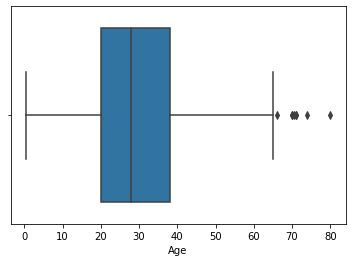

In [317]:
sns.boxplot(TitanDF['Age'])

There are outliers present in age therefore,  mean data will not be used to fill in the missing values since it is affected by outliers.

Using KNN Imputation technique for imputing missing data.

In [318]:
from sklearn.impute import KNNImputer

In [319]:
imp = KNNImputer(n_neighbors=2)

In [320]:
TitanDF_filled = TitanDF.copy()

In [321]:
TitanDF_filled = imp.fit_transform(TitanDF_filled[['Sex','Age']])

In [322]:
TitanDF_filled

array([[ 1., 22.],
       [ 0., 38.],
       [ 0., 26.],
       ...,
       [ 0., 32.],
       [ 1., 26.],
       [ 1., 32.]])

In [323]:
type(TitanDF_filled)

numpy.ndarray

In [324]:
TitanDF_filled = pd.DataFrame(TitanDF_filled, columns=['Sex','Age']) #to convert numpy array back into dataframe


In [325]:
TitanDF_filled.index = TitanDF.index

In [326]:
TitanDF[['Age','Sex']] = TitanDF_filled[['Age','Sex']]

In [327]:
TitanDF['Age'].isnull().sum()

0

There are no more values missing from 'Age' column.

### Finding Correlation 

In [328]:
t_corr = TitanDF.corr()
t_corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
Survived,1.000000,-0.335549,-0.541585,-0.061387,-0.034040,0.083151,0.255290,0.169966,0.004536,-0.151777
Pclass,-0.335549,1.000000,0.127741,-0.327795,0.081656,0.016824,-0.548193,-0.245733,0.220558,0.076466
Sex,-0.541585,0.127741,1.000000,0.065452,-0.116348,-0.247508,-0.179958,-0.084520,-0.075217,0.121405
Age,-0.061387,-0.327795,0.065452,1.000000,-0.225819,-0.173839,0.091212,0.034131,-0.004313,-0.027190
SibSp,-0.034040,0.081656,-0.116348,-0.225819,1.000000,0.414542,0.160887,-0.060074,-0.026692,0.069438
Parch,0.083151,0.016824,-0.247508,-0.173839,0.414542,1.000000,0.217532,-0.011588,-0.081585,0.061512
Fare,0.255290,-0.548193,-0.179958,0.091212,0.160887,0.217532,1.000000,0.270731,-0.116684,-0.163758
C,0.169966,-0.245733,-0.084520,0.034131,-0.060074,-0.011588,0.270731,1.000000,-0.148646,-0.782613
Q,0.004536,0.220558,-0.075217,-0.004313,-0.026692,-0.081585,-0.116684,-0.148646,1.000000,-0.499261
S,-0.151777,0.076466,0.121405,-0.027190,0.069438,0.061512,-0.163758,-0.782613,-0.499261,1.000000


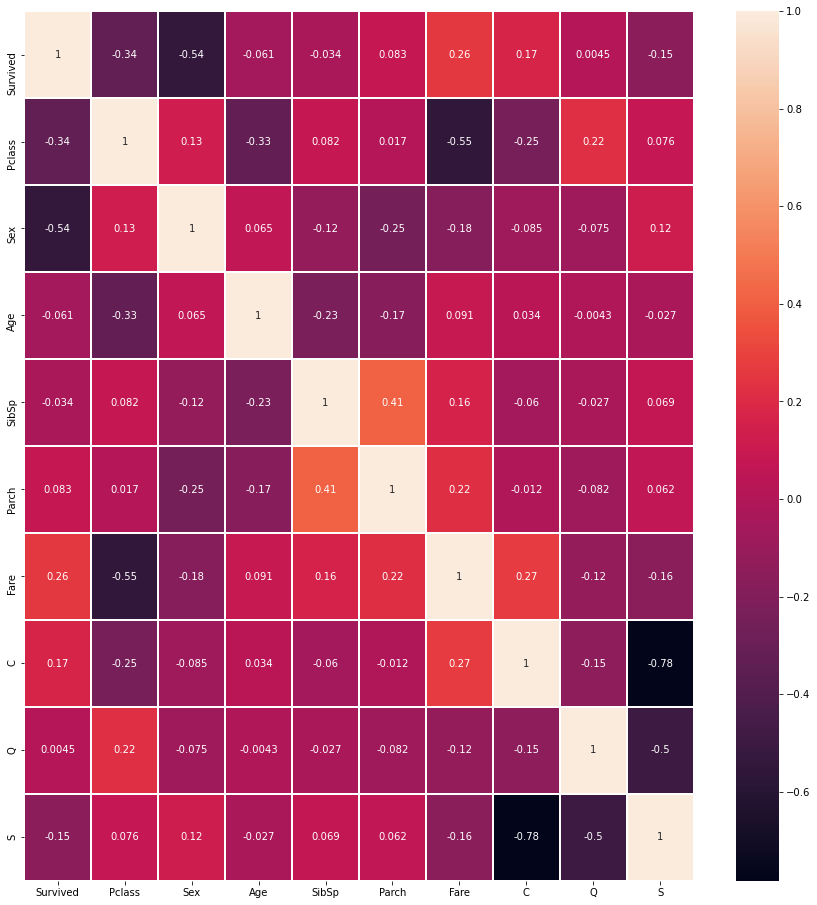

In [329]:
plt.figure(figsize=(15,16))
sns.heatmap(t_corr,annot=True,linewidth=1)
plt.show()

### Visualizing correlation of feature columns with label column.

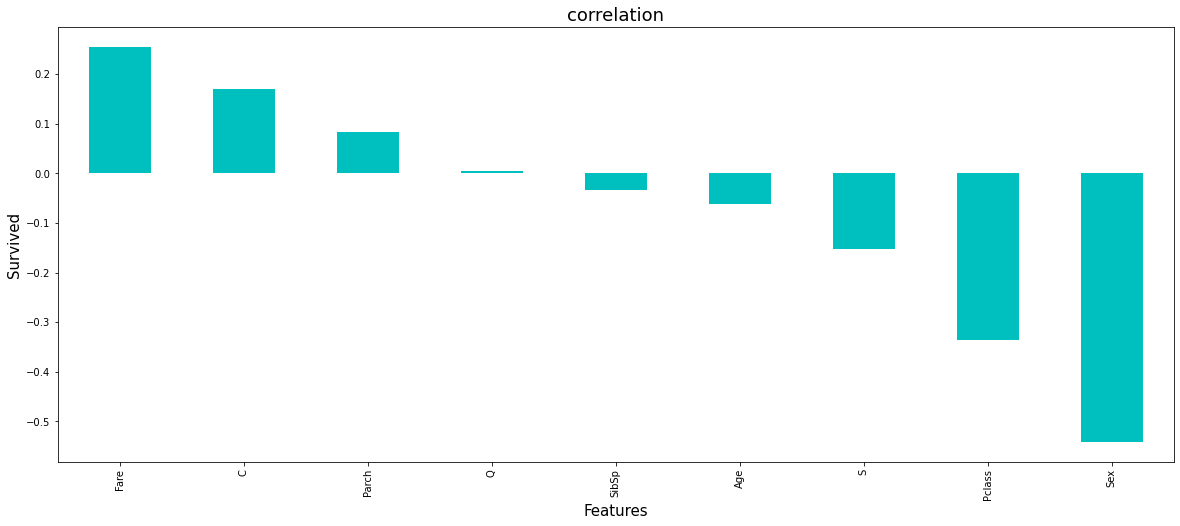

In [330]:
plt.figure(figsize = (20,8))
TitanDF.corr()['Survived'].sort_values(ascending = False).drop(['Survived']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Survived',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

It can be observed that 'female' has the highest positive correlation with 'Survived', while 'Male' has the highest negative correlation with 'Survived'.

This may be due to the 'Save women and children first' policy, while the men risked their lives to save and evacuate the passengers.

Pclass also has a high negative correlation with 'Survived' indicating that Pclass 1 passengers were given top priority during rescue and evacuation.

Fare also has a considerable correlation with 'Survived' indicating that those who paid premium prices were given higher priority during rescue and evacuation.


In [331]:
X = TitanDF.drop(columns = ['Survived'])
y = TitanDF['Survived']

### Interpreting Relationship between Dependent Variable and Independent Variables

'Survived' vs Continuous Data Columns

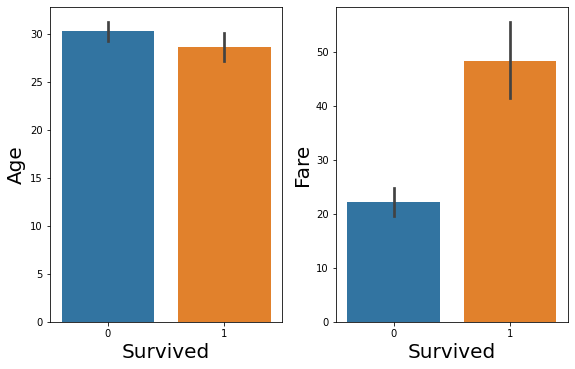

In [332]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = TitanDF['Survived']
X = TitanDF[['Age','Fare']]
for col in X:
    if plotnum<=23:
        plt.subplot(5,5,plotnum)
        sns.barplot(y,X[col])
        plt.xlabel('Survived',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

It can be observed that the passengers who paid higher fare amounts were more likely to have survived than those who paid lesser amounts.

It can also observed that, there isn't a very strong correlation between passenger age and survival.

'Survived' vs Categorical/Discrete Data Columns

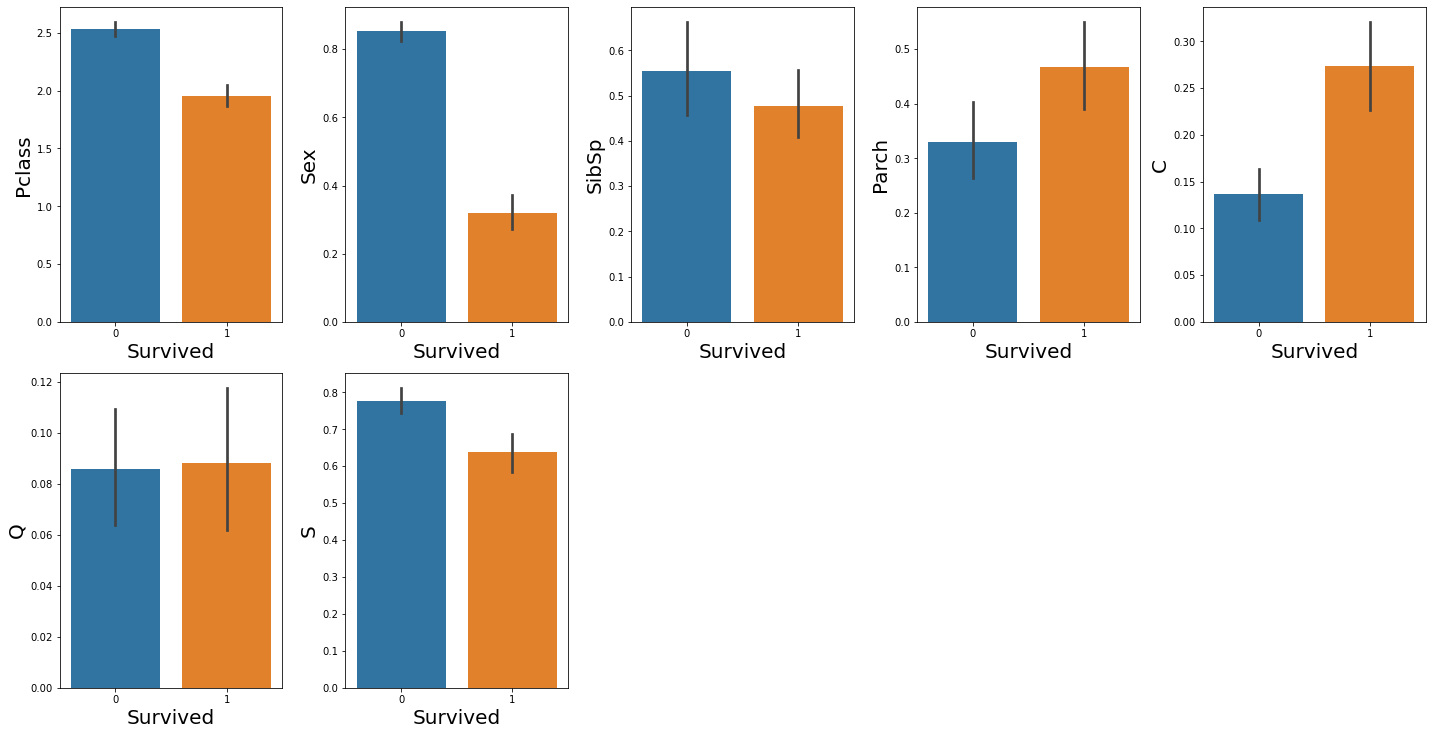

In [333]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = TitanDF['Survived']
X = TitanDF.drop(columns=['Survived','Age','Fare'])
for col in X:
    if plotnum<=23:
        plt.subplot(5,5,plotnum)
        sns.barplot(y,X[col])
        plt.xlabel('Survived',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

From the graphs above, it can be observed that Passengers belonging to Pclass 1 and 2 had highest survival chance.
Women had higher chance of survival than men.
Passengers who embarked from 'C' had higher chance of Survival than those who had embarked from 'Q' and 'S'

Combining 'SibSP' and 'Parch' to form 'Family' column to get a better understanding of correlation between survivors and passengers traveling with thier families.

In [334]:
TitanDF['Families'] = TitanDF['Parch']+TitanDF['SibSp']

In [335]:
TitanDF['Families']

0      1
1      1
2      0
3      1
4      0
      ..
884    0
885    0
886    3
887    0
888    0
Name: Families, Length: 889, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

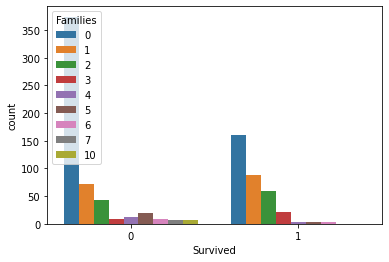

In [336]:
sns.countplot(y, hue =TitanDF['Families'])

It can be observed that amongst those who survived and those who didnt, Solo passengers are the most. While passengers onboard with smaller families had higher chance of survival than those with big families.

dropping columns 'SibSp' and 'Parch'

In [337]:
TitanDF.drop(columns=['SibSp','Parch'],inplace=True )

<AxesSubplot:xlabel='Survived', ylabel='count'>

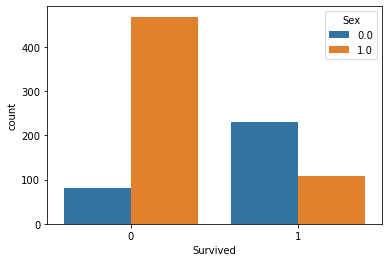

In [338]:
sns.countplot(y, hue =TitanDF['Sex'])

Women were more likely to have survived than men

<AxesSubplot:xlabel='Survived', ylabel='Age'>

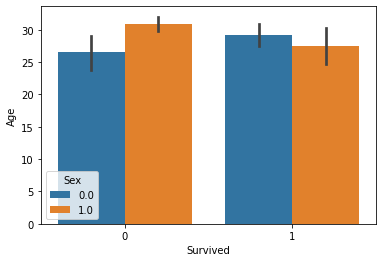

In [339]:
sns.barplot(x =TitanDF['Survived'],y = TitanDF['Age'], hue = TitanDF['Sex'])

It can also be observed that amongst the survivors the males were mostly young indicating that the young children were given highest priority during rescue and evacuation while the young and able bodied men were able to save themselves and the older ones were unfortunate.

In [340]:
TitanDF

,Survived,Pclass,Sex,Age,Fare,C,Q,S,Families
0,0,3,1.0,22.0,7.2500,0,0,1,1
1,1,1,0.0,38.0,71.2833,1,0,0,1
2,1,3,0.0,26.0,7.9250,0,0,1,0
3,1,1,0.0,35.0,53.1000,0,0,1,1
4,0,3,1.0,35.0,8.0500,0,0,1,0
...,...,...,...,...,...,...,...,...,...
884,0,2,1.0,27.0,13.0000,0,0,1,0
885,1,1,0.0,19.0,30.0000,0,0,1,0
886,0,3,0.0,32.0,23.4500,0,0,1,3
887,1,1,1.0,26.0,30.0000,1,0,0,0


### Checking for Outliers

In [341]:
X = TitanDF.drop(columns = ['Survived'])
y = TitanDF['Survived']

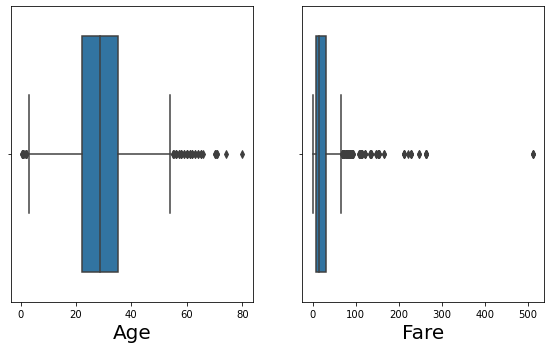

In [342]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
feat= ['Age','Fare']
for col in X[feat]:
    if plotnum<=11:
        plt.subplot(4,4,plotnum)
        sns.boxplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

#### Removing Outliers using Z score Method

In [343]:
df2 = X[feat].copy()

In [344]:
from scipy.stats import zscore
zscor = zscore(df2)
z_score_abs = np.abs(zscor)

df3 = df2[(z_score_abs < 3).all(axis=1)] #taking 3 as threshold value

In [345]:
df3.shape

(862, 2)

In [346]:
df2.shape

(889, 2)

##### Data loss %:

In [347]:
loss=(889-862)/889 * 100
loss

3.0371203599550056

3.03% Data loss is within acceptable range

#### Using IQR Method

In [348]:
df =X[feat].copy()

In [349]:
indxdrop = np.array([])
for colm in df:
    q1 = df[colm].quantile(0.25)
    q3 = df[colm].quantile(0.75)
    iqr = q3-q1
    upperval = q3 + (1.5*iqr)
    lowerval = q1 - (1.5*iqr)
    col = df[colm]
    indx = col[(col > upperval) | (col < lowerval)].index
    indxdrop = np.append(indxdrop, indx)
# find all the indices of outliers in the columns using IQR and append them to indxdrop array 

In [350]:
indxdrop 

array([  7.,  11.,  15.,  16.,  33.,  54.,  77.,  93.,  95., 115., 118.,
       151., 163., 169., 171., 173., 182., 194., 204., 231., 251., 267.,
       274., 279., 296., 304., 325., 339., 365., 380., 385., 437., 455.,
       466., 468., 478., 482., 486., 491., 492., 529., 544., 554., 569.,
       586., 624., 625., 629., 641., 643., 646., 658., 671., 683., 693.,
       744., 754., 771., 787., 802., 823., 826., 829., 849., 877.,   1.,
        27.,  31.,  34.,  52.,  61.,  71.,  87., 101., 117., 119., 123.,
       138., 150., 158., 179., 194., 200., 214., 217., 223., 229., 244.,
       255., 256., 257., 261., 267., 268., 274., 289., 290., 296., 298.,
       304., 305., 306., 309., 310., 317., 318., 323., 324., 331., 333.,
       335., 336., 340., 365., 368., 372., 374., 376., 379., 384., 389.,
       392., 411., 434., 437., 444., 452., 483., 485., 495., 497., 503.,
       504., 519., 526., 536., 539., 543., 549., 556., 557., 580., 584.,
       586., 590., 608., 626., 640., 644., 654., 65

In [351]:
df = df.drop(indxdrop)

In [352]:
df.shape

(721, 2)

##### Data loss %:

In [353]:
loss=(889-721)/889 * 100
loss

18.89763779527559

18.89% data loss is outside acceptable range.

#### Using Z score method to reduce outliers

In [354]:
dropindx = X.index.difference(df3.index)

In [355]:
dropindx

Int64Index([ 27,  87,  95, 115, 117, 257, 298, 310, 340, 376, 379, 437, 492,
            526, 556, 629, 671, 678, 688, 699, 715, 729, 736, 741, 744, 778,
            849],
           dtype='int64')

In [356]:
TitanDF.drop(dropindx,inplace = True) #dropping the outliers from original features Dataframe

In [357]:
X = TitanDF.drop(columns = ['Survived'])
y = TitanDF['Survived']

In [358]:
X.isnull().sum()

Pclass      0
Sex         0
Age         0
Fare        0
C           0
Q           0
S           0
Families    0
dtype: int64

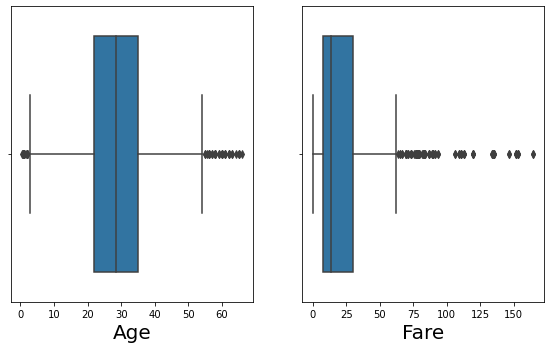

In [359]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
feat= ['Age','Fare']
for col in X[feat]:
    if plotnum<=11:
        plt.subplot(4,4,plotnum)
        sns.boxplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Some amount of outliers has been removed.

### Normalizing Data Distribution


In [360]:
X[feat].skew()

Age     0.238238
Fare    2.279424
dtype: float64

In [361]:
(X[feat]==0).sum()

Age      0
Fare    15
dtype: int64

There are outliers present in fare therefore,  mean data will not be used to fill in the missing values since it is affected by outliers.

Using KNN Imputation technique for imputing missing data.

In [362]:
imp = KNNImputer(n_neighbors=2)

In [363]:
X_filled = X.copy()

In [364]:
X_filled = imp.fit_transform(X_filled[['Pclass','Fare']])

In [365]:
X_filled

array([[ 3.    ,  7.25  ],
       [ 1.    , 71.2833],
       [ 3.    ,  7.925 ],
       ...,
       [ 3.    , 23.45  ],
       [ 1.    , 30.    ],
       [ 3.    ,  7.75  ]])

In [366]:
type(X_filled)

numpy.ndarray

In [367]:
X_filled = pd.DataFrame(X_filled, columns=['Pclass','Fare']) #to convert numpy array back into dataframe


In [368]:
X_filled.index = X.index

In [369]:
X[['Pclass','Fare']] = X_filled[['Pclass','Fare']]

In [370]:
X['Fare'].isnull().sum()

0

There are no more values missing from 'Fare' column.

In [371]:
X.skew()

Pclass     -0.715372
Sex        -0.639189
Age         0.238238
Fare        2.279424
C           1.680697
Q           2.910027
S          -1.056235
Families    2.802387
dtype: float64

#### Reducing skewness further using PowerTransformer

In [372]:
from sklearn.preprocessing import PowerTransformer

In [373]:
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)

In [374]:
df4 = X[['Fare','Families']]

In [375]:
transformed= powtrans.fit_transform(df4)

In [376]:
transformed = pd.DataFrame(transformed, columns=df4.columns) #to convert numpy array back into dataframe


In [377]:
transformed.skew()

Fare       -0.009414
Families    0.546482
dtype: float64

In [378]:
transformed.index = X.index

In [379]:
X[['Fare','Families']] = transformed[['Fare','Families']]

In [380]:
X.skew()

Pclass     -0.715372
Sex        -0.639189
Age         0.238238
Fare       -0.009414
C           1.680697
Q           2.910027
S          -1.056235
Families    0.546482
dtype: float64

In [381]:
X.isnull().sum()

Pclass      0
Sex         0
Age         0
Fare        0
C           0
Q           0
S           0
Families    0
dtype: int64

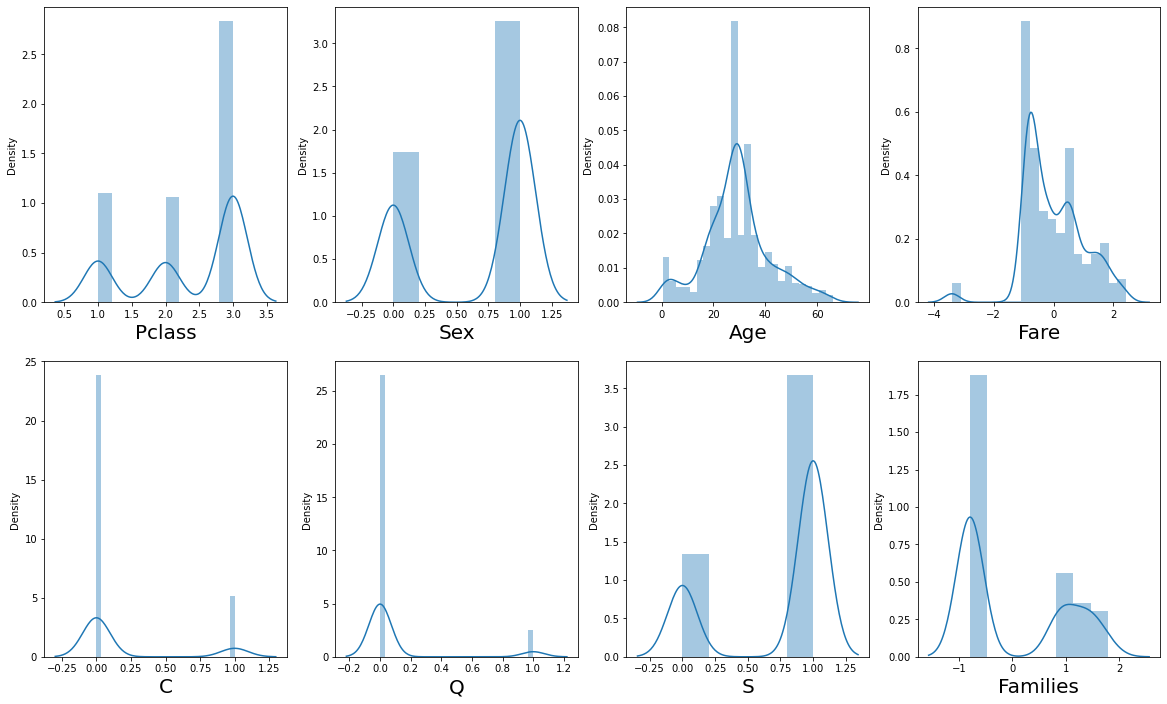

In [382]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in X:
    if plotnum<=10:
        plt.subplot(4,4,plotnum)
        sns.distplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

#### Distributions look much more Normalised now

### Feature Selection

In [383]:
from sklearn.preprocessing import StandardScaler

In [384]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(X)

In [385]:
scaled_X 

array([[ 0.7994893 ,  0.73062154, -0.58138018, ..., -0.31095355,
         0.60326118,  0.90850781],
       [-1.64868042, -1.36869768,  0.702247  , ..., -0.31095355,
        -1.65765681,  0.90850781],
       [ 0.7994893 , -1.36869768, -0.26047338, ..., -0.31095355,
         0.60326118, -0.79210461],
       ...,
       [ 0.7994893 , -1.36869768,  0.22088681, ..., -0.31095355,
         0.60326118,  1.52047922],
       [-1.64868042,  0.73062154, -0.26047338, ..., -0.31095355,
        -1.65765681, -0.79210461],
       [ 0.7994893 ,  0.73062154,  0.22088681, ...,  3.21591437,
        -1.65765681, -0.79210461]])

### Checking for Multicollinearity using Variance Inflation Factor

In [386]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [387]:
vif = pd.DataFrame()

In [388]:
vif["Features"] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]

In [389]:
vif

,Features,vif
0,Pclass,2.090198
1,Sex,1.143503
2,Age,1.205194
3,Fare,2.514240
4,C,inf
5,Q,inf
6,S,inf
7,Families,1.656581


There is no multicollinearity 

### Selecting Kbest Features

In [390]:
from sklearn.feature_selection import SelectKBest, f_classif

In [391]:
bestfeat = SelectKBest(score_func = f_classif, k = 8)
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [392]:
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(11,'Score'))

    Feature       Score
1       Sex  339.693591
0    Pclass  105.325560
3      Fare   97.228558
7  Families   28.326530
4         C   23.201391
6         S   19.167697
2       Age    2.575024
5         Q    0.111014


#### Retaining all features.

In [440]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(X)

In [441]:
scaled_X

array([[ 0.7994893 ,  0.73062154, -0.58138018, ..., -0.31095355,
         0.60326118,  0.90850781],
       [-1.64868042, -1.36869768,  0.702247  , ..., -0.31095355,
        -1.65765681,  0.90850781],
       [ 0.7994893 , -1.36869768, -0.26047338, ..., -0.31095355,
         0.60326118, -0.79210461],
       ...,
       [ 0.7994893 , -1.36869768,  0.22088681, ..., -0.31095355,
         0.60326118,  1.52047922],
       [-1.64868042,  0.73062154, -0.26047338, ..., -0.31095355,
        -1.65765681, -0.79210461],
       [ 0.7994893 ,  0.73062154,  0.22088681, ...,  3.21591437,
        -1.65765681, -0.79210461]])

## Classification Model Building

In [442]:
from sklearn.model_selection import train_test_split

#### Finding the best random state

In [446]:
from sklearn.ensemble import RandomForestClassifier
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(scaled_X,y,test_size = .31, random_state = i,stratify = y)
    modRF =  RandomForestClassifier()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.8507462686567164 on random_state: 16


In [447]:
x_train,x_test,y_train,y_test = train_test_split(scaled_X,y,test_size = .31, stratify = y,random_state = 16) #since class imbalance exists

In [448]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve

In [449]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [450]:
DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier()
XGBC= XGBClassifier()
LOGR= LogisticRegression(solver='liblinear')
SV =  SVC()
KNN = KNeighborsClassifier()

### Training the Models

In [451]:
DTC.fit(x_train,y_train)
RFC.fit(x_train,y_train)
XGBC.fit(x_train,y_train)
SV.fit(x_train,y_train)
LOGR.fit(x_train,y_train)
KNN.fit(x_train,y_train)

[12:44:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


KNeighborsClassifier()

### Decision Tree Classifier Model Accuracy

In [452]:
DTCpred = DTC.predict(x_test)
accu = classification_report(y_test,DTCpred)

In [453]:
conf_matrx = confusion_matrix(y_test,DTCpred)

In [454]:
conf_matrx

array([[139,  28],
       [ 21,  80]], dtype=int64)

In [455]:
print(accu)

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       167
           1       0.74      0.79      0.77       101

    accuracy                           0.82       268
   macro avg       0.80      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268



### Logistic Regression Model Accuracy

In [456]:
LOGRpred = LOGR.predict(x_test)
accu = classification_report(y_test,LOGRpred)


In [457]:
conf_matrx = confusion_matrix(y_test,LOGRpred)
conf_matrx

array([[147,  20],
       [ 23,  78]], dtype=int64)

In [458]:
print(accu)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       167
           1       0.80      0.77      0.78       101

    accuracy                           0.84       268
   macro avg       0.83      0.83      0.83       268
weighted avg       0.84      0.84      0.84       268



### Random Forest Classifier Model Accuracy

In [462]:
RFCpred = RFC.predict(x_test)
accu = classification_report(y_test,RFCpred)

In [463]:
conf_matrx = confusion_matrix(y_test,RFCpred)
conf_matrx

array([[149,  18],
       [ 21,  80]], dtype=int64)

In [464]:
print(accu)

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       167
           1       0.82      0.79      0.80       101

    accuracy                           0.85       268
   macro avg       0.85      0.84      0.84       268
weighted avg       0.85      0.85      0.85       268



### XGB Classifier Model Accuracy

In [465]:
XGBCpred = XGBC.predict(x_test)
accu = classification_report(y_test,XGBCpred)

In [466]:
conf_matrx = confusion_matrix(y_test,XGBCpred)
conf_matrx

array([[144,  23],
       [ 19,  82]], dtype=int64)

In [467]:
print(accu)

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       167
           1       0.78      0.81      0.80       101

    accuracy                           0.84       268
   macro avg       0.83      0.84      0.83       268
weighted avg       0.84      0.84      0.84       268



### SV Classifier Model Accuracy

In [468]:
SVpred = SV.predict(x_test)
accu = classification_report(y_test,SVpred)



In [469]:
conf_matrx = confusion_matrix(y_test,SVpred)
conf_matrx

array([[161,   6],
       [ 34,  67]], dtype=int64)

In [470]:
print(accu)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89       167
           1       0.92      0.66      0.77       101

    accuracy                           0.85       268
   macro avg       0.87      0.81      0.83       268
weighted avg       0.86      0.85      0.84       268



### K Nearest Neighbours Classifier Model Accuracy

In [471]:
KNNpred = KNN.predict(x_test)
accu = classification_report(y_test,KNNpred)



In [472]:
conf_matrx = confusion_matrix(y_test,KNNpred)
conf_matrx

array([[154,  13],
       [ 30,  71]], dtype=int64)

In [493]:
print(accu)

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       167
           1       0.85      0.70      0.77       101

    accuracy                           0.84       268
   macro avg       0.84      0.81      0.82       268
weighted avg       0.84      0.84      0.84       268



### Model Cross Validation

In [473]:
from sklearn.model_selection import cross_val_score as cvs

#### Decision Tree Classifier

In [476]:
print(cvs(DTC,scaled_X,y,cv=5).mean())

0.7737935206344939


#### Logistic Regression

In [477]:
print(cvs(LOGR,scaled_X,y,cv=5).mean()) 

0.7888560290361608


#### Random Forest Classifier

In [478]:
print(cvs(RFC,scaled_X,y,cv=5).mean())

0.7970493345879823


#### XGB Classifier

In [483]:
print(cvs(XGBC,scaled_X,y,cv=5).mean())

[12:47:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:47:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:47:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:47:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

#### SV Classifier

In [484]:
print(cvs(SV,scaled_X,y,cv=5).mean())

0.8155464444145718


#### K Nearest Neighbours Classifier

In [485]:
print(cvs(KNN,scaled_X,y,cv=5).mean())

0.8121857776582875


### Based on comparing Accuracy Score results with Cross Validation results, it is determined that XGB is the best model.

### ROC AUC Scores

#### Decision Tree Classifier

In [486]:
roc_auc_score(y_test,DTCpred)

0.8122072686310547

#### Logistic Regression

In [487]:
roc_auc_score(y_test,LOGRpred)

0.826258374340428

#### Random Forest Classifier

In [488]:
roc_auc_score(y_test,RFCpred)

0.8421473883915338

#### XGB Classifier

In [489]:
roc_auc_score(y_test,XGBCpred)

0.8370783186103042

#### SV Classifier

In [490]:
roc_auc_score(y_test,SVpred)

0.8137190964605443

#### K Nearest Neighbours Classifier

In [491]:
roc_auc_score(y_test,KNNpred)

0.8125629928262287

Random Forest Classifier  is the best model for the dataset, with roc_auc_score 0.8502

### ROC AUC curves 

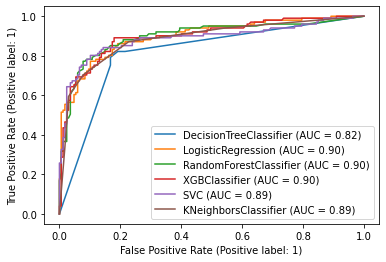

In [492]:
disp = plot_roc_curve(DTC,x_test,y_test)
mod = [LOGR,RFC,XGBC,SV,KNN]
for i in mod:
    plot_roc_curve(i,x_test,y_test, ax=disp.ax_)
plt.legend(prop={'size':10}, loc = 'lower right')
plt.show()

### Based on the above graph and roc_auc_scores, Random Forest Classifier is the best model for the dataset, with AUC = 0.90 and roc_auc_score = 0.8421

### Hyper Parameter Tuning

In [495]:
from sklearn.model_selection import GridSearchCV

#### Random Forest Classifier

In [497]:
parameter = {'n_estimators':[30,50,60],'max_depth': [10,20,40,60,80],'min_samples_leaf':[5,10,15,20,30],'min_samples_split':[2,5,10,20],'criterion':['gini','entropy'],'max_features':["auto","sqrt","log2"]}

In [498]:
GridCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1)

In [499]:
GridCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 40, 60, 80],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 15, 20, 30],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [30, 50, 60]})

In [501]:
GridCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 50}

In [522]:
Best_mod1 = RandomForestClassifier(n_estimators = 50,criterion = 'entropy', max_depth= 20, max_features = 'log2',min_samples_leaf = 5, min_samples_split = 10)
Best_mod1.fit(x_train,y_train)
rfpred = Best_mod1.predict(x_test)
acc = accuracy_score(y_test,rfpred)
print(acc*100)


87.31343283582089


##### Random Forest Classifier has an accuracy of 87.31%

In [525]:
conf_matrx = confusion_matrix(y_test,rfpred)
conf_matrx

array([[156,  11],
       [ 23,  78]], dtype=int64)

In [533]:
cr = classification_report(y_test,rfpred)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       167
           1       0.88      0.77      0.82       101

    accuracy                           0.87       268
   macro avg       0.87      0.85      0.86       268
weighted avg       0.87      0.87      0.87       268



#### XGB Classifier

In [504]:
parameter = {'booster':["gbtree","gblinear"],'eta': [0.01,0.1,0.2,0.3],'min_child_weight':np.arange(5),'max_depth':[10,20,40,60,80],'subsample':[0.5,1]}

In [505]:
GridCV = GridSearchCV(XGBClassifier(),parameter,cv=5,n_jobs = -1,verbose = 1)

In [506]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
[13:23:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [507]:
GridCV.best_params_

{'booster': 'gbtree',
 'eta': 0.1,
 'max_depth': 10,
 'min_child_weight': 4,
 'subsample': 0.5}

In [509]:
Best_mod2 = XGBClassifier(booster = 'gbtree',eta = 0.1, max_depth= 10, min_child_weight = 4,subsample = 0.5)
Best_mod2.fit(x_train,y_train)

[13:25:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.100000001, max_delta_step=0, max_depth=10,
              min_child_weight=4, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [524]:
xgbpred = Best_mod2.predict(x_test)

acc = accuracy_score(y_test,xgbpred)
print(acc*100)

86.94029850746269


In [526]:
conf_matrx = confusion_matrix(y_test,xgbpred)
conf_matrx

array([[155,  12],
       [ 23,  78]], dtype=int64)

In [534]:
cr = classification_report(y_test,xgbpred)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       167
           1       0.87      0.77      0.82       101

    accuracy                           0.87       268
   macro avg       0.87      0.85      0.86       268
weighted avg       0.87      0.87      0.87       268



##### XGB Classifier has an accuracy of 86.94%

In [527]:
roc_auc_score(y_test,rfpred)

0.8532044821248592

In [528]:
roc_auc_score(y_test,xgbpred)

0.8502104701488112

### On comparing the accuracies and ROC AUC scores of the Random Forest Classifier Model and XGB Classifier Model, it is determined that  Random Forest Classifier Model is better.

### Random Forest Classifier also has better Confusion matrix performance than XGB Classifier Model

#### Saving The Model

In [530]:
import joblib
joblib.dump(Best_mod1,"BestModelTitanic.pkl")

['BestModelTitanic.pkl']

#### Loading The Model

In [531]:
mod=joblib.load("BestModelTitanic.pkl")

In [532]:
print(mod.predict(x_test))

[0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0
 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1
 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1
 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0
 0 0 1 1 0 1 0 0 1]
